In [3]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])

In [5]:
def translate(data):
    decoded_review = " ".join(
     [reverse_word_index.get(i - 3, "?") for i in data])
    return decoded_review
    

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i in range(len(sequences)):
        for j in sequences[i]:
            result[i][j] = 1
    return result

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [9]:
model = keras.Sequential([
    layers.Dense(18, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 1s 20ms/step - loss: 0.5271 - accuracy: 0.7863 - val_loss: 0.4050 - val_accuracy: 0.8694
Epoch 2/10
30/30 [==============================] - 0s 10ms/step - loss: 0.3219 - accuracy: 0.9005 - val_loss: 0.3105 - val_accuracy: 0.8873
Epoch 3/10
30/30 [==============================] - 0s 10ms/step - loss: 0.2320 - accuracy: 0.9257 - val_loss: 0.2871 - val_accuracy: 0.8857
Epoch 4/10
30/30 [==============================] - 0s 10ms/step - loss: 0.1818 - accuracy: 0.9403 - val_loss: 0.2793 - val_accuracy: 0.8868
Epoch 5/10
30/30 [==============================] - 0s 10ms/step - loss: 0.1496 - accuracy: 0.9498 - val_loss: 0.2860 - val_accuracy: 0.8854
Epoch 6/10
30/30 [==============================] - 0s 10ms/step - loss: 0.1217 - accuracy: 0.9631 - val_loss: 0.3105 - val_accuracy: 0.8788
Epoch 7/10
30/30 [==============================] - 0s 10ms/step - loss: 0.1029 - accuracy: 0.9674 - val_loss: 0.3284 - val_accuracy: 0.8790
Epoch 8/10
30

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

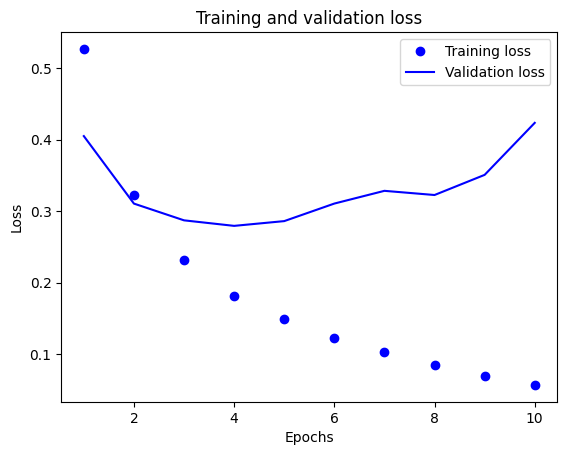

In [14]:
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

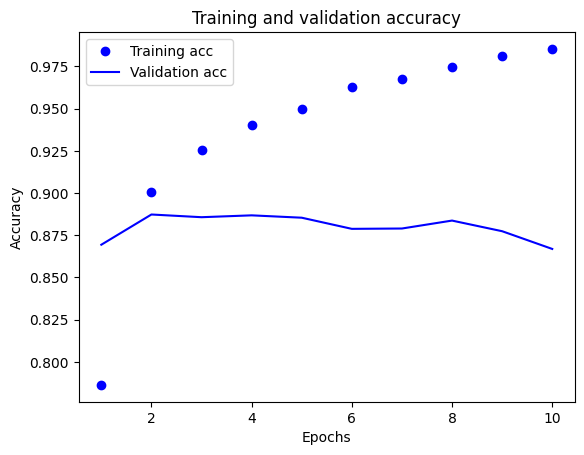

In [15]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.4465 - accuracy: 0.8562


In [17]:
results

[0.44654491543769836, 0.8562399744987488]

In [18]:
model.predict(x_test)

array([[0.14696756],
       [0.99991655],
       [0.99691135],
       ...,
       [0.03904158],
       [0.1073586 ],
       [0.9022063 ]], dtype=float32)